In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(64*4,48*4, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False

2023-03-17 12:12:29.168067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 12:12:29.259851: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-17 12:12:29.259864: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-17 12:12:29.750051: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
inputs = keras.Input(shape=(64*4, 48*4, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3, activation = "sigmoid")(x)
model = keras.Model(inputs, outputs)

In [3]:
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
BATCH_SIZE = 32

train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest'
)

validation_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
)

train_ds = train_img_gen.flow_from_directory('train-data', batch_size=BATCH_SIZE, shuffle=True, class_mode='categorical', target_size=(64*4, 48*4),)
val_ds = validation_img_gen.flow_from_directory('validation-data', batch_size=BATCH_SIZE, shuffle=True, class_mode='categorical', target_size=(64*4, 48*4),)


Found 187 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [4]:
model.compile(loss="categorical_crossentropy",
optimizer=Adam(learning_rate= 0.0001),
metrics=["accuracy"])

history =  model.fit(train_ds, epochs=10, validation_data= val_ds)

Epoch 1/10
6/6 [==============================] - 7s 849ms/step - loss: 1.0406 - accuracy: 0.4599 - val_loss: 0.9660 - val_accuracy: 0.6452
Epoch 2/10
6/6 [==============================] - 6s 1s/step - loss: 0.9977 - accuracy: 0.5722 - val_loss: 0.8690 - val_accuracy: 0.6774
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 0.8541 - accuracy: 0.6845 - val_loss: 0.7831 - val_accuracy: 0.6774
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 0.7894 - accuracy: 0.7326 - val_loss: 0.7078 - val_accuracy: 0.7419
Epoch 5/10
6/6 [==============================] - 6s 1s/step - loss: 0.7360 - accuracy: 0.8128 - val_loss: 0.6413 - val_accuracy: 0.8387
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: 0.6556 - accuracy: 0.8610 - val_loss: 0.5826 - val_accuracy: 0.9032
Epoch 7/10
6/6 [==============================] - 7s 1s/step - loss: 0.5842 - accuracy: 0.9091 - val_loss: 0.5312 - val_accuracy: 0.9677
Epoch 8/10
6/6 [======================

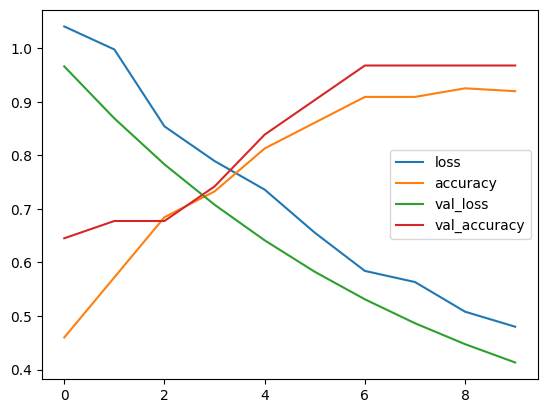

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df_hist = pd.DataFrame(history.history)
plt.show()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.show()

In [6]:
test_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
)
single = test_img_gen.flow_from_directory('single-test', batch_size=BATCH_SIZE, shuffle=True, class_mode='categorical', target_size=(64*4, 48*4),)
image = single.next()[0][:1]

model.predict(image)

Found 1 images belonging to 1 classes.
1/1 [==============================] - 1s 904ms/step


array([[0.31597516, 0.6793066 , 0.55299854]], dtype=float32)